In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

class Chebyshev:
    """
    Chebyshev(a, b, n, func)
    Given a function func, lower and upper limits of the interval [a,b],
    and maximum degree n, this class computes a Chebyshev approximation
    of the function.
    Method eval(x) yields the approximated function value.
    """
    def __init__(self, a, b, n, func):
        self.a = a
        self.b = b
        self.func = func
        
        bma = 0.5 * (b - a)
        bpa = 0.5 * (b + a)
        f = [func(math.cos(math.pi * (k + 0.5) / n) * bma + bpa) for k in range(n)]
        self.roots = f
        
        self.x = [math.cos(math.pi * (k + 0.5) / n) * bma + bpa for k in range(n)]

        fac = 2.0 / n
        self.c = [fac * sum([f[k] * math.cos(math.pi * j * (k + 0.5) / n)
                  for k in range(n)]) for j in range(n)]

    def eval(self, x):
        a,b = self.a, self.b
        #assert(a <= x <= b)
        y = (2.0 * x - a - b) * (1.0 / (b - a))
        y2 = 2.0 * y
        (d, dd) = (self.c[-1], 0)             # Special case first step for efficiency
        for cj in self.c[-2:0:-1]:            # Clenshaw's recurrence
            (d, dd) = (y2 * d - dd + cj, d)
        return y * d - dd + 0.5 * self.c[0]   # Last step is different
    
def sgn_chebyshev(x):
    return Chebyshev(-10, 10, 200, sgn).eval(x)

def equal_chebyshev(x):
    return Chebyshev(-10, 10, 100, sgn).eval(equal_zero)


Max error: 3.552713678800501e-15


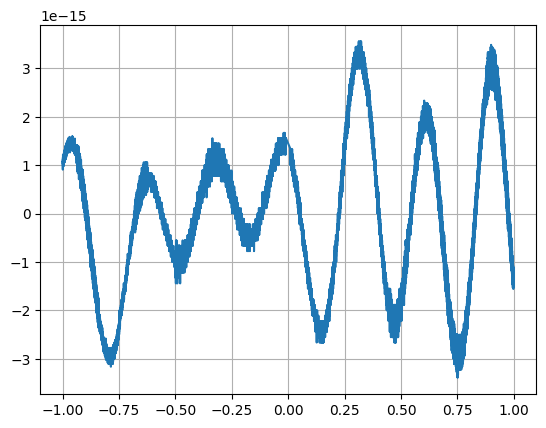

In [159]:
n = 119

fun = np.sinc

c = Chebyshev(-5, 5, n, fun)

x = np.append(np.linspace(-1, -0.01, 10000), np.linspace(0.01, 1, 10000)) 

y = np.vectorize(c.eval)(x)
y_real = np.vectorize(fun)(x)

print("Max error:", np.linalg.norm(y - y_real, ord=np.infty))


plt.grid()
plt.plot(x, y - y_real)
plt.show()

In [160]:
c.c

[0.14608704457372368,
 -1.4497331906377603e-17,
 -0.11068459429158851,
 3.2492810233980494e-17,
 0.13578416987788178,
 2.3954945899222793e-18,
 -0.13617313160133346,
 4.145251121231869e-18,
 0.09774053221188046,
 -3.316701998829921e-17,
 -0.15200741513577173,
 -3.0701781132575447e-16,
 0.15712441906400798,
 -1.7067779372074275e-16,
 -0.09169664500952307,
 -1.5958476552654338e-16,
 0.03444411207183269,
 -5.861137723329568e-17,
 -0.009148365038718598,
 1.2536884826843413e-17,
 0.0018266903451071089,
 6.592905857687589e-18,
 -0.0002860273660673264,
 3.016633103444962e-18,
 3.6216978116536076e-05,
 -1.136410151467732e-16,
 -3.796083192549158e-06,
 4.38306950112517e-17,
 3.354959279249492e-07,
 1.8557395714057038e-17,
 -2.5378098997447134e-08,
 -5.80091439257218e-17,
 1.6635326300603049e-09,
 1.1364078737320754e-16,
 -9.548673203050882e-11,
 9.883960553025521e-17,
 4.842556447502994e-12,
 8.912893510597485e-17,
 -2.1877837413174553e-13,
 3.0524436634361744e-16,
 8.517862854637432e-15,
 -2.4

In [166]:
eps = 0.01

In [190]:
eps / np.sinc(eps)

0.010001645123493129

In [188]:
np.sinc(2+eps)

0.004974306043335856

In [189]:
eps / 2

0.005

In [176]:
x = 2

In [178]:
np.sin(eps*np.pi)/(x*np.pi + eps*np.pi)

0.004974306043336063

In [181]:
np.sin(0.0000001 * np.pi) > 0.0000001 * np.pi

False

In [177]:
eps*np.pi/(x*np.pi + eps*np.pi)

0.0049751243781094535

In [165]:
(x*np.pi + eps*np.pi)

array([-3.11017673, -3.10986568, -3.10955463, ...,  3.17238648,
        3.17269753,  3.17300858])

In [161]:
len(c.c)

119

In [6]:
def sigmoid(x):
    return 1/(1 + np.exp(-k * x))

In [7]:
def sgn(x):
    if math.isclose(0, x, rel_tol=1e-9, abs_tol=0.0):
        return 0.5
    
    if x > 0:
        return 1.0
    else:
        return 0.0

In [8]:
def eq(x):
    if math.isclose(0, x, rel_tol=1e-9, abs_tol=0.0):
        return 1
   
    return 0.0

In [9]:
def clean(x):
    return 3*x**2 - 2*x**3

## High-degree approximations

With $\delta = 0.01$

Max error: 0.028507686548140787


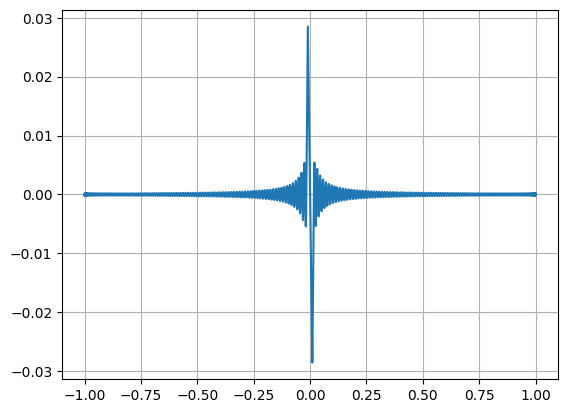

In [10]:
k = 360
n = 494

fun = sigmoid

c = Chebyshev(-1, 1, n, fun)

x = np.append(np.linspace(-1, -0.01, 10000), np.linspace(0.01, 1, 10000)) 

y = np.vectorize(c.eval)(x)
y_real = np.vectorize(sgn)(x)

print("Max error:", np.linalg.norm(y - y_real, ord=np.infty))


plt.grid()
plt.plot(x, y - y_real)
plt.show()

In [67]:
n = 4

In [134]:
v = [1,2,1,4]

In [135]:
vexp = np.tensordot(v, [1,1,1,1], axes=0).reshape(-1)
vexp

array([1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 4, 4, 4, 4])

In [136]:
vrep = np.tensordot([1,1,1,1], v, axes=0).reshape(-1)
vrep

array([1, 2, 1, 4, 1, 2, 1, 4, 1, 2, 1, 4, 1, 2, 1, 4])

In [137]:
vrep - vexp

array([ 0,  1,  0,  3, -1,  0, -1,  2,  0,  1,  0,  3, -3, -2, -3,  0])

In [138]:
somma = np.vectorize(sgn)(vrep - vexp)
somma

array([0.5, 1. , 0.5, 1. , 0. , 0.5, 0. , 1. , 0.5, 1. , 0.5, 1. , 0. ,
       0. , 0. , 0.5])

In [139]:
somma = somma + np.roll(somma, 4)
somma = somma + np.roll(somma, 8)

somma = somma + np.tensordot([1,1,1,1], [0.5, 0.5, 0.5, 0.5], axes=0).reshape(-1)
somma

array([1.5, 3. , 1.5, 4. , 1.5, 3. , 1.5, 4. , 1.5, 3. , 1.5, 4. , 1.5,
       3. , 1.5, 4. ])

In [147]:
eq = np.vectorize(sgn)(vrep - vexp) 
eq = eq * (1 - eq) * 4

In [148]:
s1 = eq + np.roll(eq, 4)
s1 = s1 + np.roll(s1, 8)

s1

array([2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1.])

In [149]:
triangular_matrix = []

for rows in range(n):
    for cols in range(n - rows, n):
        triangular_matrix.append(0.0)
    for cols in range(0, n - rows):
        triangular_matrix.append(1.0)

In [150]:
s2 = np.multiply(eq, np.array(triangular_matrix))

s2 = s2 + np.roll(s2, 4)
s2 = s2 + np.roll(s2, 8)

s2

array([1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1.])

In [151]:
somma + 0.5 * s1 - s2 + 0.5

array([2., 3., 1., 4., 2., 3., 1., 4., 2., 3., 1., 4., 2., 3., 1., 4.])

Then we apply some cleaning

Max error: 3.782699550733117e-06


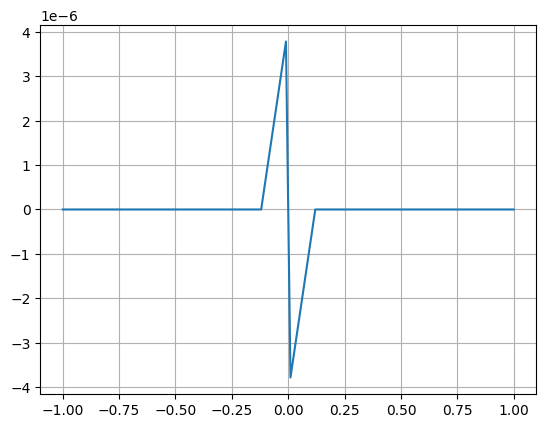

In [111]:
k = 360
n = 495

fun = sigmoid

c = Chebyshev(-1, 1, n, fun)

x = np.append(np.linspace(-1, -0.01, 10), np.array([0]))
x = np.append(x, np.linspace(0.01, 1, 10))

y = np.vectorize(c.eval)(x)
y = np.vectorize(clean)(y)
y = np.vectorize(clean)(y)

y_real = np.vectorize(sgn)(x)

print("Max error:", np.linalg.norm(y - y_real, ord=np.infty))

plt.grid()
plt.plot(x, y - y_real)
plt.show()

Let's see the error on the derivative

Max error: 3.7826852419172257e-06


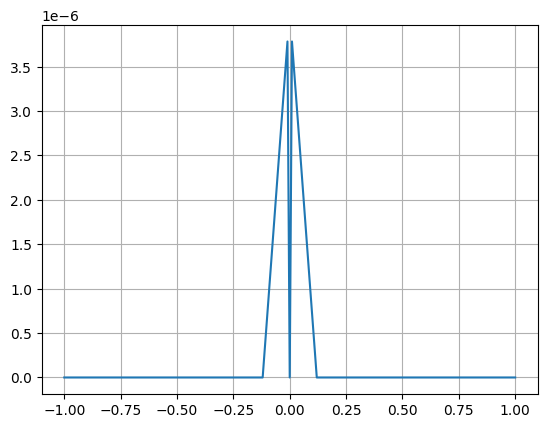

In [112]:
k = 360
n = 495

fun = sigmoid

c = Chebyshev(-1, 1, n, fun)

x = np.append(np.linspace(-1, -0.01, 10), np.array([0]))
x = np.append(x, np.linspace(0.01, 1, 10))

y = np.vectorize(c.eval)(x)
y = np.vectorize(clean)(y)
y = np.vectorize(clean)(y)
y = np.multiply(y, np.subtract(1,  y))


y_real = np.vectorize(eq)(x)
y_real = 0.25 * y_real

print("Max error:", np.linalg.norm(y - y_real, ord=np.infty))

plt.grid()
plt.plot(x, y - y_real)
plt.show()

In [114]:
print("The difference between the errrors is", 1.5130740967668903e-05 / 3.782699550733117e-06, "as expected")

The difference between the errrors is 3.999984869201797 as expected


With $\delta = 0.001$

/var/folders/f4/cjlhwcw50v97ltsgj1fxyssm0000gn/T/ipykernel_2670/67177262.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-k * x))


Error in 0.01: 0.009206680595516215


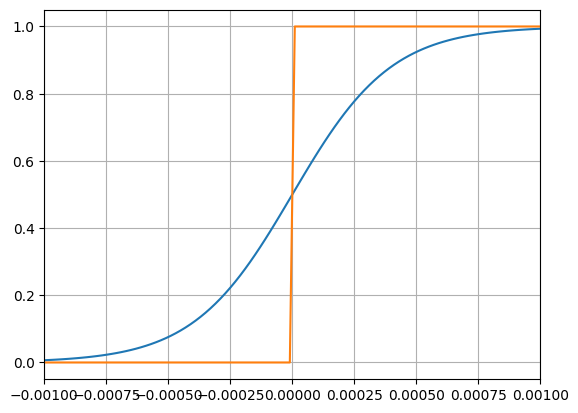

In [91]:
k = 5000
n = 7901

fun = sigmoid

c = Chebyshev(-1, 1, n, fun)

x = np.linspace(-1, 1, 100000)

vectorized_sigmoid = np.vectorize(sigmoid)
y = vectorized_sigmoid(x)

print("Error in 0.01: " + str(c.eval(-0.001)))

plt.xlim(-0.001, 0.001)
plt.grid()
plt.plot(x, y)
plt.plot(x, np.vectorize(sign)(x))
plt.show()